In [0]:
import warnings
warnings.simplefilter("ignore")

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
X = pd.read_csv("X.csv")
y = X['NUM_GRAVEDAD']
X = X.drop('NUM_GRAVEDAD',axis = 1)

In [4]:
X.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'DIA', 'PERIODO', 'DIA_SEMANA', 'MES',
       'NUM_COMUNA', 'NUM_DISENO', 'NUM_CLASE', 'NUM_BARRIO'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=1)

In [6]:
X_train.head()

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_DISENO,NUM_CLASE,NUM_BARRIO
24587,-75.570249,6.261566,669489.0,1634820.0,17.0,2018.0,5.0,7.0,2.0,1.0,0.0,67.0
7134,-75.562483,6.205784,560263.0,1625887.0,2.0,2018.0,6.0,5.0,9.0,1.0,0.0,184.0
25654,-75.579162,6.203825,671629.0,1645345.0,9.0,2018.0,5.0,10.0,8.0,1.0,0.0,66.0
49148,-75.552630,6.288404,721637.0,1675627.0,24.0,2019.0,1.0,6.0,13.0,1.0,2.0,69.0
3875,-75.579949,6.273574,554718.0,1615255.0,3.0,2018.0,4.0,2.0,12.0,1.0,0.0,217.0


# Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y, cv=5, scoring='r2')
scores

array([-4.31393070e-04,  3.03398086e-04,  6.04403321e-05,  2.13827584e-04,
       -1.17150717e-02])

In [11]:
scores.mean()

-0.002313759755936462

In [12]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.0029639445880966786

# Seleccion de modelos

In [13]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True, cv=5)
results

{'fit_time': array([0.02777028, 0.0634532 , 0.03629684, 0.03678608, 0.03898787]),
 'score_time': array([0.00189137, 0.00178719, 0.00171614, 0.00174046, 0.00171876]),
 'test_score': array([-4.31393070e-04,  3.03398086e-04,  6.04403321e-05,  2.13827584e-04,
        -1.17150717e-02]),
 'train_score': array([0.0030637 , 0.00340066, 0.0034343 , 0.00402467, 0.00317074])}

In [14]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.0034188153634733044
-0.002313759755936462


In [15]:
varianza = np.mean(train_scores) / np.mean(test_scores)
print(f'varianza : {varianza }')

varianza : -1.477601706357619


**Hasta aqui lasso nos dice que no puede mejorar mas, debemos ver otros modelos**

# Validation Curves y Learning Curves

Vecino mas cercano

In [16]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(),X,y,cv=5)

{'fit_time': array([1.25787425, 1.37308931, 1.92912436, 2.12461424, 1.25003862]),
 'score_time': array([0.07007885, 0.10354042, 0.11864376, 0.09741044, 0.06342912]),
 'test_score': array([-0.52094576, -0.35201008, -0.34706783, -0.17868772, -0.11972092])}

In [17]:
cross_validate(KNeighborsRegressor(n_neighbors=10),X,y,cv=5)

{'fit_time': array([1.25670457, 1.3204329 , 1.88932395, 2.16921592, 1.24876809]),
 'score_time': array([0.07940722, 0.11852264, 0.13569856, 0.1095593 , 0.07045364]),
 'test_score': array([-0.4650055 , -0.2321405 , -0.21519046, -0.08487193, -0.04791098])}

In [18]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [0]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [20]:
np.mean(train_scores, axis=1)

array([0.65772577, 0.44899536, 0.36195542, 0.3096084 , 0.27295273,
       0.24546277, 0.22564454, 0.20849349, 0.19486664, 0.18362159,
       0.17432343, 0.16632169, 0.16004798, 0.15468599, 0.14982877,
       0.1456533 , 0.1418023 , 0.13792927, 0.13408881, 0.13108132,
       0.12789317, 0.12483521, 0.12155344, 0.11853705])

In [21]:
print(f'Score :  {np.mean(train_scores)}')

Score :  0.21241285118071254


([<matplotlib.axis.XTick at 0x7f0015a7f2e8>,
 [Text(-5.0, 0, '2'),
  Text(0.0, 0, '4'),
  Text(5.0, 0, '6'),
  Text(10.0, 0, '8'),
  Text(15.0, 0, '10'),
  Text(20.0, 0, '12'),
  Text(25.0, 0, '14'),
  Text(0, 0, '16'),
  Text(0, 0, '18'),
  Text(0, 0, '20'),
  Text(0, 0, '22'),
  Text(0, 0, '24'),
  Text(0, 0, '26'),
  Text(0, 0, '28'),
  Text(0, 0, '30'),
  Text(0, 0, '32'),
  Text(0, 0, '34'),
  Text(0, 0, '36'),
  Text(0, 0, '38'),
  Text(0, 0, '40'),
  Text(0, 0, '42'),
  Text(0, 0, '44'),
  Text(0, 0, '46'),
  Text(0, 0, '48')])

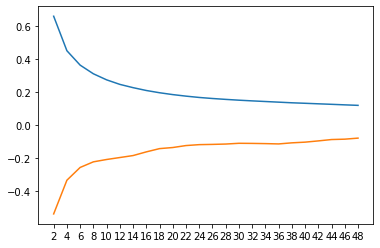

In [28]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.savefig('K-neighbors.png')
plt.xticks(np.arange(24),n)


El mejor parametro que se puede elijir es 8 vecinos

# Curva de aprendizaje

In [0]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=8),X,y, cv=5)

samples, train, test = lc[0],lc[1],lc[2] 

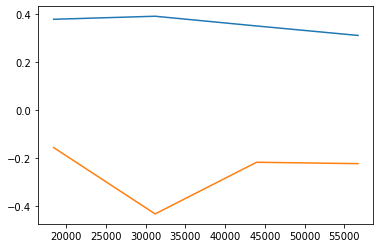

In [34]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])
plt.savefig('curva-aprendizaje.png')



El modelo KNeighbors esta aprendiendo va creciendo pero a un no a terminado de aprender

para que termine de aprender debemos agregarle mas datos

Aprender: Cuando mejora el score en función de la cantidad de datos